# Linear Regression

## Import packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Read data

In [2]:
data = pd.read_csv('new_diamonds.csv', dtype=float)
data

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,5.0,6.0,2.0,61.5,55.0,326.0,3.95,3.98,2.43
1,0.21,4.0,6.0,3.0,59.8,61.0,326.0,3.89,3.84,2.31
2,0.23,2.0,6.0,5.0,56.9,65.0,327.0,4.05,4.07,2.31
3,0.29,4.0,2.0,4.0,62.4,58.0,334.0,4.20,4.23,2.63
4,0.31,2.0,1.0,2.0,63.3,58.0,335.0,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,5.0,7.0,3.0,60.8,57.0,2757.0,5.75,5.76,3.50
53936,0.72,2.0,7.0,3.0,63.1,55.0,2757.0,5.69,5.75,3.61
53937,0.70,3.0,7.0,3.0,62.8,60.0,2757.0,5.66,5.68,3.56
53938,0.86,4.0,3.0,2.0,61.0,58.0,2757.0,6.15,6.12,3.74


## Generate Some images

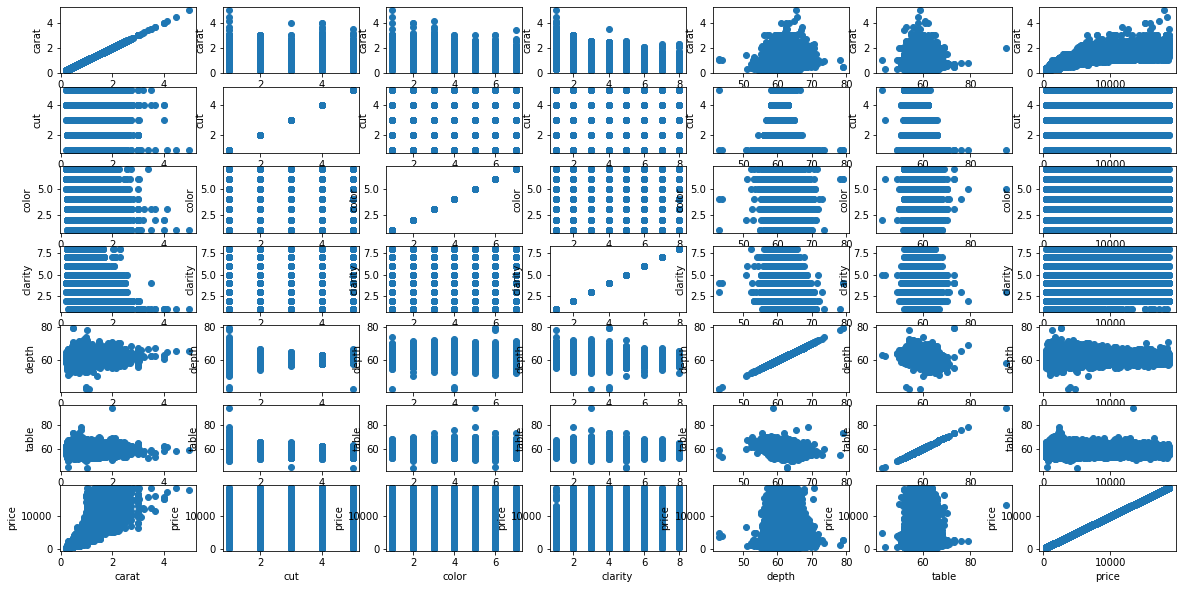

In [3]:
# 0:carat, 4:depth, 5:table
title = ["carat", "cut", "color", "clarity", "depth", "table", "price"]
n = len(title)

plt.figure(figsize=(20,10))

for i in range(n):
    for j in range(n):
        plt.subplot(n, n, i + n * j + 1)
        
        t = title[i]
        s = title[j]

        plt.plot(data[t], data[s], 'o')
        plt.xlabel(t)
        plt.ylabel(s)

plt.show()

## Select x, y components

In [4]:
y_data = data.pop('price')
x_data = data

x_data = x_data.to_numpy()
y_data = y_data.to_numpy()


In [5]:
x_data.shape, y_data.shape

((53940, 9), (53940,))

### Select data do training and testing

In [6]:
mask = np.random.rand(x_data.shape[0]) < 0.8

In [7]:
x_train = x_data[mask]
y_train = y_data[mask]

In [8]:
x_train.shape,y_train.shape

((43125, 9), (43125,))

In [9]:
x_test = x_data[~mask]
y_test = y_data[~mask]

In [10]:
x_test.shape, y_test.shape

((10815, 9), (10815,))

## Least Squares

In [11]:
def least_squares(A, b):
    x, res, rank, s = np.linalg.lstsq(A, b, rcond=None)
    return x

In [12]:
def linear_model(x: np.ndarray, y: np.ndarray):
    if x.shape[0] != y.shape[0]:
        raise Exception("Not same Dim")

    A = []
    for i in range(len(y)):
        ai = [1] + [x[i][j] for j in range(x.shape[1])]
        A.append(ai)

    b = y.copy()

    return np.array(A), b

In [13]:
A, b = linear_model(x_train, y_train)
A.shape, b.shape


((43125, 10), (43125,))

In [14]:
coef = least_squares(A, b)

In [15]:
np.argmin([np.abs(A[i]@coef - b[i])**2 for i in range(len(b))])

29646